In [7]:
import os

import omrmodules
import torch
import cv2 as cv

import numpy as np
from omrmodules.datasets.MuscimaMeasures import visualize_bboxes

In [8]:

###
# preparation
IMAGE = os.path.join('..', 'samples', 'aural_tests.jpg')
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# load models
MODEL_MEASURE = os.path.join('..', 'saved_models', 'muscima_measures.pt')
MODEL_OBJECT = os.path.join('..', 'saved_models', 'muscima_objects_pitchonly.pt')
model_measures = torch.load(MODEL_MEASURE, map_location=torch.device('cpu'))
model_objects = torch.load(MODEL_OBJECT, map_location=torch.device('cpu'))
model_measures.to(device)
model_objects.to(device)
model_measures.eval()
model_objects.eval()
model_measures([torch.rand(1,400,400).to(device)])
model_objects([torch.rand(1,400,400).to(device)])
    
###
#

# read image
image = cv.imread(IMAGE)

# pre-process image
image = omrmodules.normalization.preprocess.processnotesheet(image)

# model inference
image = (np.expand_dims(image, 0) / 255.0).astype(np.float32)
image = [torch.from_numpy(image).to(device)]
measure_dict = model_measures(image)
object_dict = model_objects(image)

# pass results to SongFactory



1.18


In [9]:
songFactory = omrmodules.semantics.SystemObjects.SongFactory(image[0], measure_dict[0], object_dict[0])

song = songFactory.song

In [10]:
song.systems

In [11]:

boxes = []
for system in song.systems:
    boxes.append(system.bbox())
    
omrmodules.semantics.SystemObjects.denormalize_bboxes(np.asarray(boxes), image[0])

array([[   0.        ,    0.        , 1496.        ,  554.59313862],
       [   0.        ,  554.59313862, 1496.        ,  806.88263889],
       [   0.        ,  806.88263889, 1496.        , 1056.32858433],
       [   0.        , 1056.32858433, 1496.        , 1234.58254784],
       [   0.        , 1234.58254784, 1496.        , 1404.10848387],
       [   0.        , 1404.10848387, 1496.        , 1995.        ]])

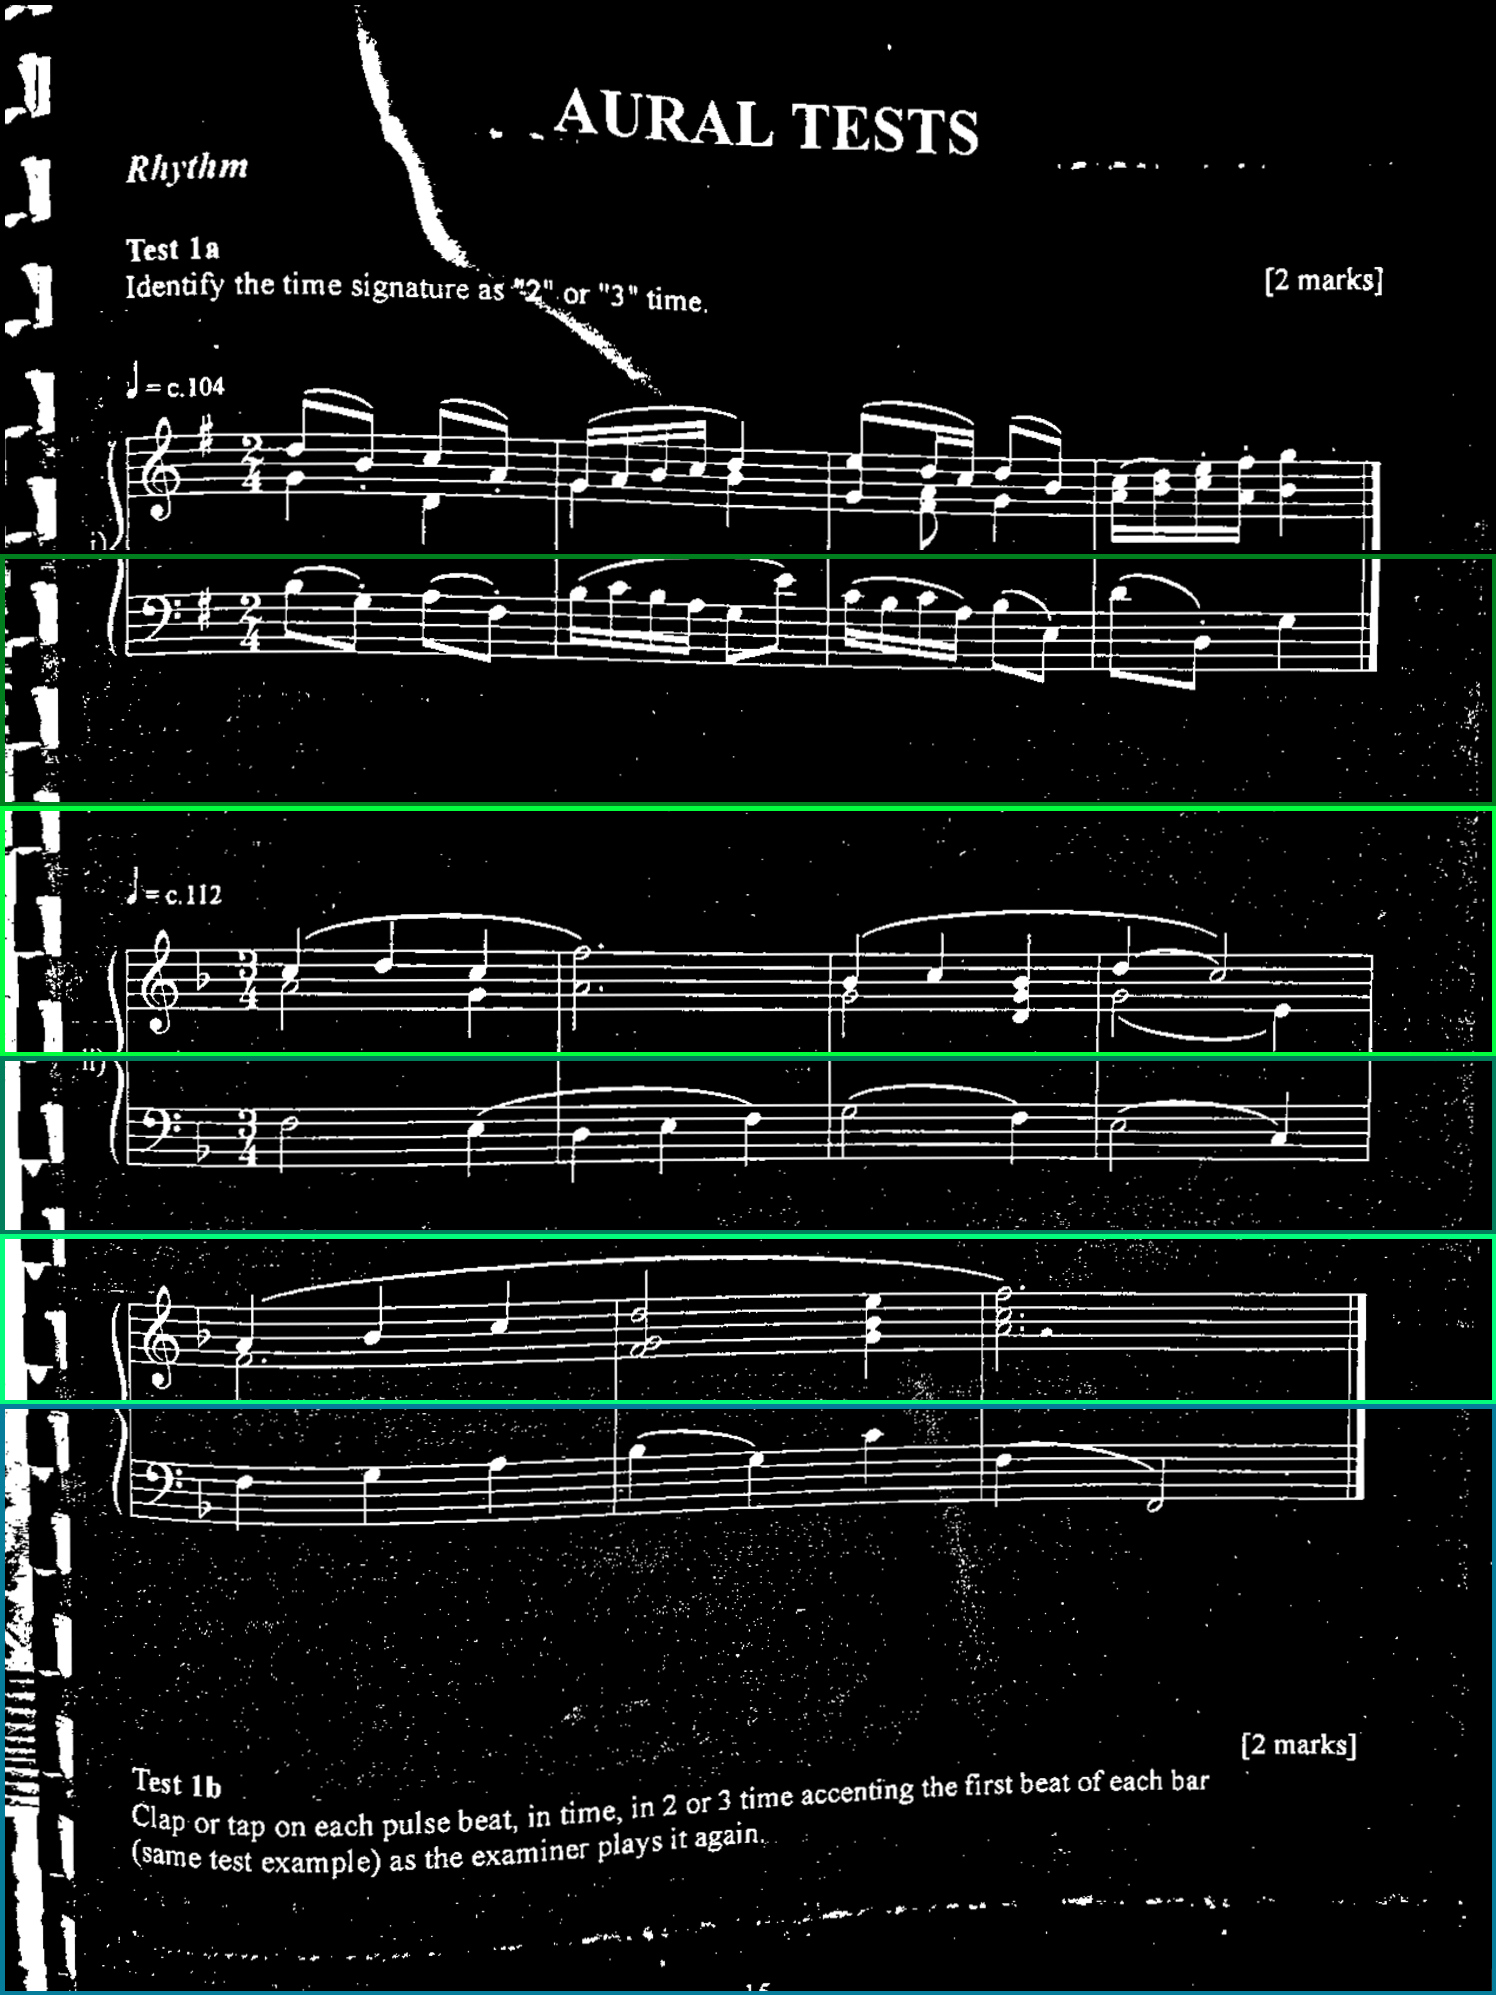

In [6]:
from torchvision.utils import draw_bounding_boxes
from PIL import Image

viz_image = (image[0]*255).type(torch.ByteTensor)
viz_boxes = omrmodules.semantics.SystemObjects.denormalize_bboxes(np.asarray(boxes), viz_image)
viz_boxes = torch.asarray(viz_boxes)

viz_im_with_bounding_boxes = draw_bounding_boxes(viz_image, viz_boxes, width=5)

Image.fromarray(np.moveaxis(viz_im_with_bounding_boxes.numpy(), 0, -1))

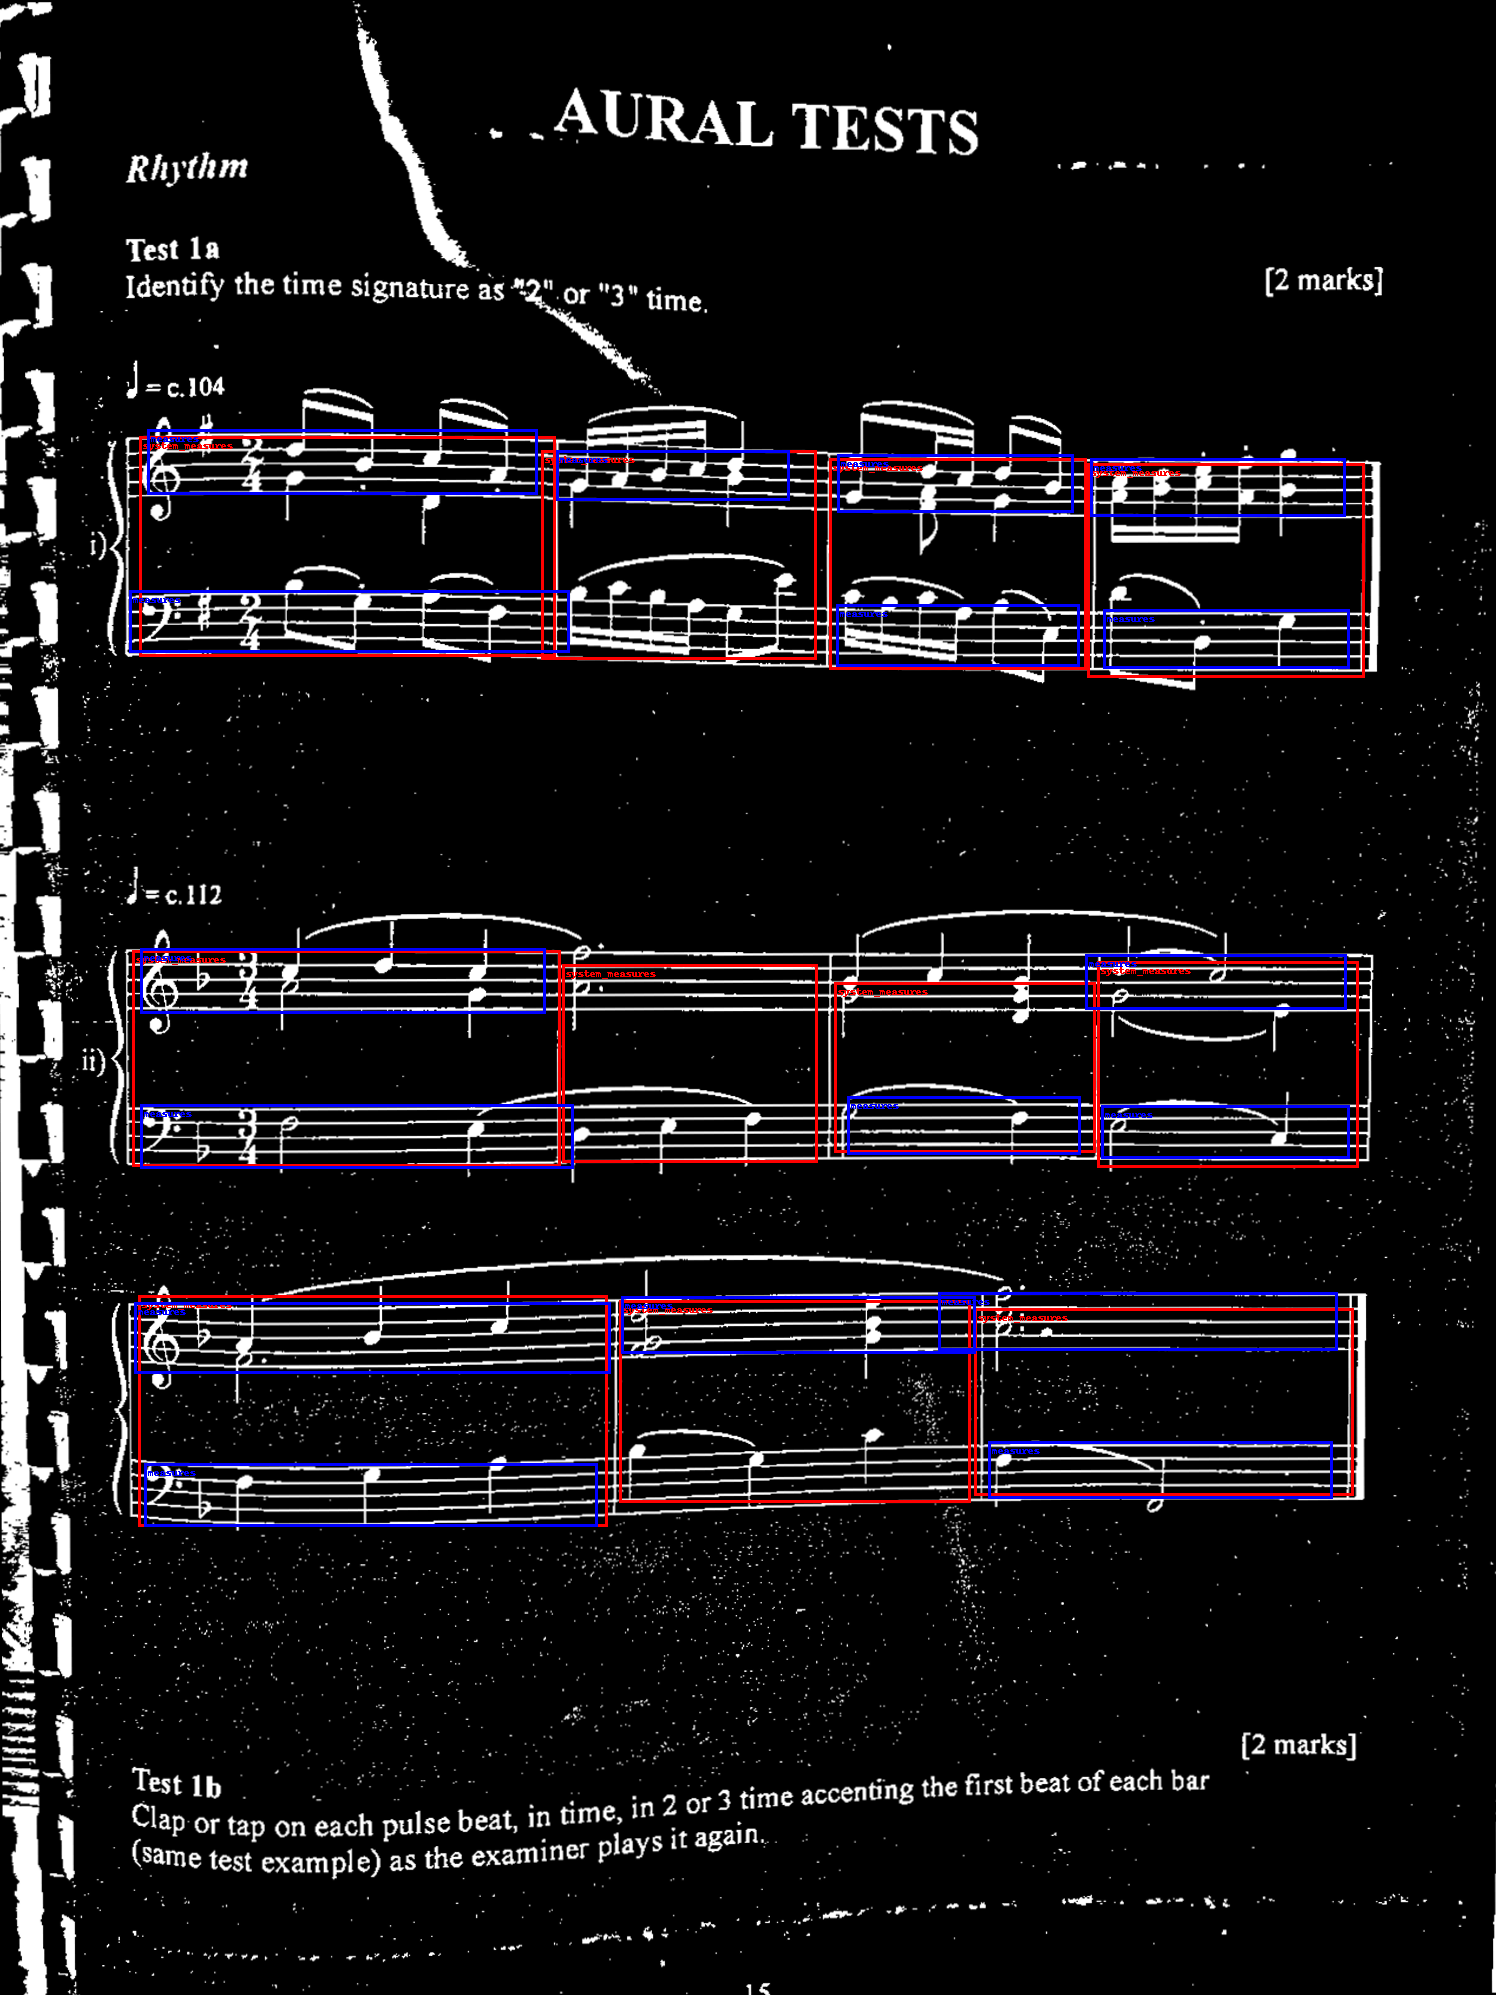

In [4]:
visualize_bboxes(image[0], measure_dict[0])

In [28]:
import importlib
importlib.reload(omrmodules.semantics.SystemObjects)

<module 'omrmodules.semantics.SystemObjects' from 'c:\\Repositories\\omrtorch\\omrmodules\\semantics\\SystemObjects.py'>

In [29]:
songFactory = omrmodules.semantics.SystemObjects.SongFactory(image[0], measure_dict[0], object_dict[0])

[0.09868725]
[0.35948068]
1
[0.3718611  0.55966175 0.72884226]
[0.52770674 0.7173601  0.8992993 ]
3
[0.08660689 0.559381   0.73733056]
[0.38090405 0.7219102  0.90205294]
3
[0.09387174 0.7255974 ]
[0.36442113 0.9001164 ]
2
[0.09397947 0.56683445]
[0.38342848 0.72211087]
2
[0.09002689]
[0.40799966]
1
[0.6605019]
[0.8907177]
1
[0.09664699]
[0.3994052]
1


NameError: name 'songFactory' is not defined

In [16]:
image = cv.imread(IMAGE)

image_processed = omrmodules.normalization.preprocess.processnotesheet(image)

1.18


In [18]:
image_processed.shape

(1995, 1496)

In [20]:
np.expand_dims(image_processed, 0)

(1, 1995, 1496)

In [21]:
from PIL import Image